In [12]:
import numpy as np
import time as time
import matplotlib.pyplot as plt

In [6]:
def drop_psk():
    print('drop psk')
def drop_as():
    print('drop as')

In [7]:
def rpm():
    return 1

In [15]:
recipe = [
    [3000,None,2],
    [4000,None,3],
    [5000,None,1]
]
drops = {
    'perovskite': 0,
    'antisolvent': 1.5
}

In [16]:
record = {
    'time':[],
    'rpm': [],
    'droptime': {d:None for d in drops}
    }

In [20]:
next_step_time = 0
time_elapsed = 0
step_idx = 0

drop_idx = 0
drop_times = list(drops.values())
drop_names = list(drops.keys())
                  
next_drop_time = drop_times[drop_idx]
drop_moves = [drop_psk, drop_as]

spincoat_completed = False
steps_completed = False
drops_completed = False

In [21]:
start_time = time.time()
while not spincoat_completed:
    time_elapsed = time.time() - start_time
    record['time'].append(time_elapsed)
    record['rpm'].append(rpm())

    if time_elapsed >= next_step_time and not steps_completed:
        if step_idx >= len(recipe):
            steps_completed = True
        else:
            speed = recipe[step_idx][0]
            acceleration = recipe[step_idx][1]
            duration = recipe[step_idx][2]
            
    #         self.spincoater.setspeed(speed, acceleration)
            print(speed)
            next_step_time += duration
            step_idx += 1
    if time_elapsed >= next_drop_time and not drops_completed:
        drop_moves[drop_idx]()
        record['droptime'][drop_names[drop_idx]] = time_elapsed
        drop_idx += 1
        if drop_idx >= len(drop_times):
            drops_completed = True
        else:
            next_drop_time = drop_times[drop_idx]

    if drops_completed and steps_completed:
        spincoat_completed = True
    time.sleep(0.5)

3000
drop psk
drop as
4000
5000


In [23]:
record['droptime']

{'perovskite': 0.0, 'antisolvent': 1.5134203433990479}

In [24]:
import frgtools.plotting as frgplt

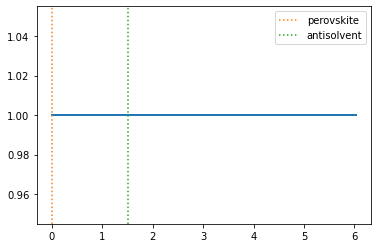

In [25]:
plt.plot(record['time'], record['rpm'])
for k,v in record['droptime'].items():
    frgplt.vline(v, color = None, label = k)
    
plt.legend()

In [3]:
def spincoat(self, recipe, drops):
    """
    executes a series of spin coating steps. A final "stop" step is inserted
    at the end to bring the rotor to a halt.

    recipe - nested list of steps in format:

        [
            [speed, acceleration, duration],
            [speed, acceleration, duration],
            ...,
            [speed, acceleration, duration]
        ]

        where speed = rpm, acceleration = rpm/s, duration = s

    """
    record = {
        'time':[],
        'rpm': [],
        'droptime': {d:None for d in drops}
        }

    next_step_time = 0
    time_elapsed = 0
    step_idx = 0

    drop_idx = 0
    drop_times = list(drops.values())
    drop_names = list(drops.keys())
    next_drop_time = drop_times[0]
    drop_moves = [self.liquidhandler.drop_perovskite, self.liquidhandler.drop_antisolvent]

    spincoat_completed = False
    start_time = time.time()
    while not spincoat_completed:
        time_elapsed = time.time() - start_time
        record['time'].append(time_elapsed)
        record['rpm'].append(self.spincoater.rpm)

        if time_elapsed >= next_step_time:
            speed = recipe[step_idx][0]
            acceleration = recipe[step_idx][1]
            duration = recipe[step_idx][2]

            self.spincoater.setspeed(speed, acceleration)
            next_step_time += duration	
        if time_elapsed >= next_drop_time:
            drop_moves[drop_idx]
            record['droptime'][drop_names[drop_idx]] = time_elapsed
            drop_idx += 1


        if drop_idx > len(drops) and step_idx > len(recipe):
            spincoat_completed = True

        time.sleep(self.spincoater.POLLINGRATE)


    self.spincoater.stop()

    return record